In [461]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report , accuracy_score
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder , MinMaxScaler, Imputer
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC,SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score

In [462]:
#Set path to the folder where the dataset is present
os.chdir("C:/Users/rusha/Desktop/GA-Hackathon1/")

In [429]:
#Load the dataset
dataset_original = pd.read_csv("startup_funding.csv")

#Change the column headers to lowercase and impute missing value in the target column(amountinusd) with the median
dataset_original.columns = dataset_original.columns.str.lower()
dataset_original['amountinusd'] = dataset_original['amountinusd'].str.replace(",", "").astype(float)
imputer = Imputer(missing_values = 'NaN',strategy = 'median', axis = 0)       
dataset_original["amountinusd"] = imputer.fit_transform(dataset_original[['amountinusd']])



In [430]:
#Cleaning the date column
dataset_original["date"] = dataset_original['date'].str.replace(".","/")
dataset_original["date"] = dataset_original['date'].str.replace("//","/")
date_split = dataset_original["date"].str.split("/")

In [431]:
#Adding a new month column
month=[]
for row in date_split:
    month.append(float(str(float(row[1]))))
dataset_original["month"] = pd.Series(month)

In [432]:
#Adding a new year column
year=[]
for row in date_split:
    year.append(float(str(float(row[2]))))
dataset_original["year"] = pd.Series(year)

In [433]:
#Dropping the unwanted columns
dataset_original = dataset_original.drop(["sno","date","startupname","remarks"],1)
dataset_original["month"] = dataset_original["month"].astype(str)
dataset_original["year"] = dataset_original["month"].astype(str)

In [434]:
#Removing the outliers
Q1 = dataset_original["amountinusd"].quantile(0.25)
Q3 = dataset_original["amountinusd"].quantile(0.75)
IQR = Q3 - Q1
dataset_original_clean = dataset_original[~((dataset_original["amountinusd"] < (Q1 - 1.5 * IQR)) |(dataset_original["amountinusd"] > (Q3 + 1.5 * IQR)))]

C:\Users\rusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


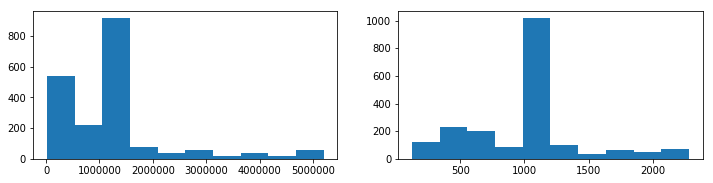

In [435]:
#Log transforming the target variable to remove skewness
plt.figure(figsize=(12,6))
plt.subplot(221)
dataset_original_clean["amountinusd"] = dataset_original_clean["amountinusd"]
plt.hist(dataset_original_clean["amountinusd"],bins=10)
plt.subplot(222)
dataset_original_clean["amountinusd"] = np.sqrt(dataset_original_clean["amountinusd"])
plt.hist(dataset_original_clean["amountinusd"],bins=10)
plt.show()

In [436]:
#dataset_original_clean = dataset_original_clean[(dataset_original_clean["citylocation"].notnull()) | (dataset_original_clean["industryvertical"].notnull()) | (dataset_original_clean["subvertical"].notnull())]
#dataset_original_clean["citylocation"].notnull().value_counts()

In [437]:
dataset_original_clean["citylocation"] = dataset_original_clean["citylocation"].fillna(value="NotSpecified")
dataset_original_clean["industryvertical"] = dataset_original_clean["industryvertical"].fillna(value="Others")
dataset_original_clean["subvertical"] = dataset_original_clean["subvertical"].fillna(value="NotSpecified")

C:\Users\rusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rusha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

In [438]:
#Dropping the unkown values
dataset_original_clean = dataset_original_clean[dataset_original_clean["investmenttype"].notnull()]

In [439]:
dataset_original_clean = dataset_original_clean[dataset_original_clean["investorsname"].notnull()]

dataset_original_clean.info()
label_encoder = LabelEncoder()
dataset_original_clean["industryvertical"] = label_encoder.fit_transform(dataset_original_clean["industryvertical"])
dataset_original_clean["subvertical"] = label_encoder.fit_transform(dataset_original_clean["subvertical"])
dataset_original_clean["citylocation"] = label_encoder.fit_transform(dataset_original_clean["citylocation"])
dataset_original_clean["investorsname"] = label_encoder.fit_transform(dataset_original_clean["investorsname"])
dataset_original_clean["investmenttype"] = label_encoder.fit_transform(dataset_original_clean["investmenttype"])
dataset_original_clean["month"] = label_encoder.fit_transform(dataset_original_clean["month"])
dataset_original_clean["year"] = label_encoder.fit_transform(dataset_original_clean["year"])


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1964 entries, 0 to 2371
Data columns (total 8 columns):
industryvertical    1964 non-null object
subvertical         1964 non-null object
citylocation        1964 non-null object
investorsname       1964 non-null object
investmenttype      1964 non-null object
amountinusd         1964 non-null float64
month               1964 non-null object
year                1964 non-null object
dtypes: float64(1), object(7)
memory usage: 138.1+ KB


In [440]:
X = dataset_original_clean.drop("amountinusd",1)
y = dataset_original_clean["amountinusd"]
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2)

In [456]:
x_ind_mean =dataset_original[["industryvertical", "amountinusd"]].groupby("industryvertical").mean().reset_index()
x_ind_count = dataset_original["industryvertical"].value_counts().reset_index()
x_ind_count.columns = ["industryvertical", "count"]
print(x_ind_count.head(5))
print(x_ind_mean.head(5))

   industryvertical  count
0                95    772
1               660    313
2               525    177
3               709    171
4               148     53
   industryvertical  amountinusd
0                 0    1070000.0
1                 1    3000000.0
2                 2    1000000.0
3                 3    1070000.0
4                 4    1000000.0


In [451]:
X_train.head()

,industryvertical,subvertical,citylocation,investorsname,investmenttype,month,year
2212,525,726,50,1611,6,5,5
648,95,457,19,236,4,1,1
1396,148,67,38,114,4,0,0
2240,525,726,50,1247,4,5,5
2367,525,726,50,204,4,0,0


In [460]:
tree_regressor = DecisionTreeRegressor(max_depth=7,max_leaf_nodes=30)
tree_regressor.fit(X_train,y_train)
y_pred = tree_regressor.predict(X_test)
print(r2_score(y_test,y_pred))

0.0272530051275095


In [459]:
rf_regressor = RandomForestRegressor(n_estimators=500)
rf_regressor.fit(X_train,y_train)
y_pred = rf_regressor.predict(X_test)

print(r2_score(y_test,y_pred))

0.03654422272286795


In [443]:
dataset_original["citylocation"] = dataset_original["citylocation"].fillna(value="NotSpecified")
dataset_original["industryvertical"] = dataset_original["industryvertical"].fillna(value="Others")
dataset_original["subvertical"] = dataset_original["subvertical"].fillna(value="NotSpecified")
dataset_original["investorsname"] = dataset_original["investorsname"].fillna(value="NotSpecified")
dataset_original["investmenttype"] = dataset_original["investmenttype"].fillna(value="NotSpecified")

In [444]:
label_encoder = LabelEncoder()
dataset_original["industryvertical"] = label_encoder.fit_transform(dataset_original["industryvertical"])
dataset_original["subvertical"] = label_encoder.fit_transform(dataset_original["subvertical"])
dataset_original["citylocation"] = label_encoder.fit_transform(dataset_original["citylocation"])
dataset_original["investorsname"] = label_encoder.fit_transform(dataset_original["investorsname"])
dataset_original["investmenttype"] = label_encoder.fit_transform(dataset_original["investmenttype"])
dataset_original["month"] = label_encoder.fit_transform(dataset_original["month"])
dataset_original["year"] = label_encoder.fit_transform(dataset_original["year"])

In [445]:
X = dataset_original.drop("amountinusd",1)
y = dataset_original["amountinusd"]
X_train,X_test,y_train,y_test = tts(X,y,test_size=0.2)

In [446]:
knn_regressor = KNeighborsRegressor()
knn_regressor.fit(X_train,y_train)
y_pred = knn_regressor.predict(X_test)
print(r2_score(y_test,y_pred))

0.00725026582507593


In [450]:
mean_list = [y_train.mean()]*len(y_test)
print(r2_score(y_test.values,mean_list))

-0.0002949211615776992


In [449]:
y_test

435       1070000.0
1874       300000.0
624       6000000.0
2231      1070000.0
1584      1070000.0
549       1000000.0
1834      1000000.0
1284      1070000.0
1246      1070000.0
1297      1070000.0
928         30000.0
2180      1800000.0
2007      3000000.0
91        4500000.0
400       2000000.0
344        400000.0
687        150000.0
440       1070000.0
2151       165000.0
2235      3000000.0
1447     20000000.0
1022      1070000.0
278        120000.0
1551      1900000.0
2045      1070000.0
1997      4000000.0
816       1070000.0
1291      1070000.0
547       1070000.0
749        225000.0
           ...     
645       1070000.0
587       1070000.0
44       15000000.0
362         40000.0
215       1070000.0
2341    100000000.0
2068      6000000.0
1049      1070000.0
1704       130000.0
106       1070000.0
2280      3000000.0
2101      2000000.0
640      30000000.0
546       1070000.0
1692        77000.0
1896      1070000.0
1096       250000.0
1927     10000000.0
468        200000.0
